Spam Data

Load the spam data set.

Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

Is there any overlap in the bigrams for the spam data and the ham data?

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

Explore the blog articles using the techniques discussed in the exploration lesson.

Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from wordcloud import WordCloud
import acquire as a
import prepare as prep
import explore as ex

In [4]:
def prep_article_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the text article title, original text, stemmed text,
    lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
    '''
    df['clean'] = df[column].apply(prep.basic_clean)\
                            .apply(prep.tokenize)\
                            .apply(prep.remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    df['stemmed'] = df['clean'].apply(prep.stem)
    
    df['lemmatized'] = df['clean'].apply(prep.lemmatize)
    
    return df

In [14]:
df = pd.read_csv('spam.csv')
print(df.shape)
df.head()

(5572, 3)


,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df = prep.prepare_data(df, 'text', ['i','she', 'he', 'you'])

In [16]:
df.head()

,id,label,text,clean,stemmed,lemmatized
0,0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though


In [17]:
ham_words =' '.join(df[df.label == 'ham'].lemmatized)
spam_words = ' '.join(df[df.label == 'spam'].lemmatized)
all_words = ' '.join(df.lemmatized)

In [19]:
def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

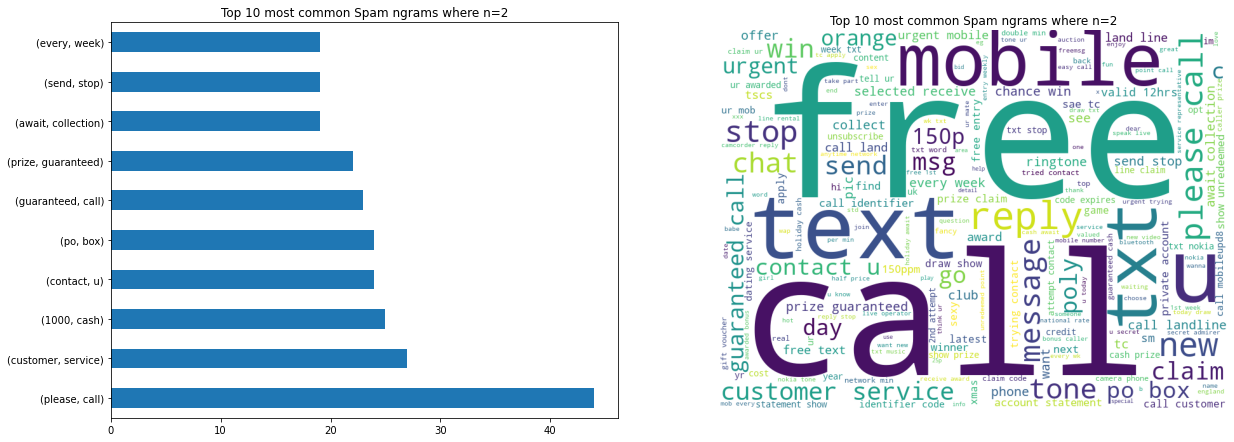

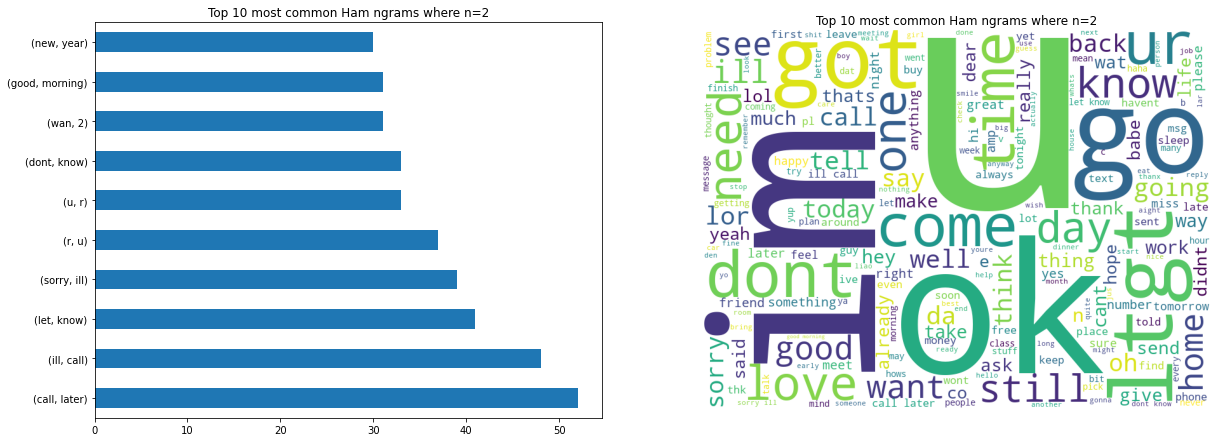

In [20]:
ngrams_wordcloud([spam_words, ham_words], ['Spam', 'Ham'])

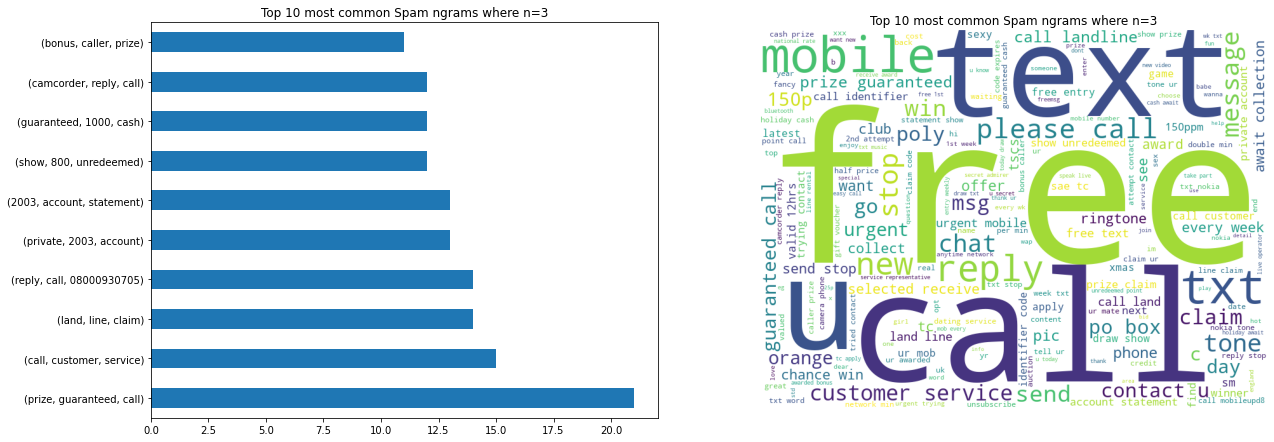

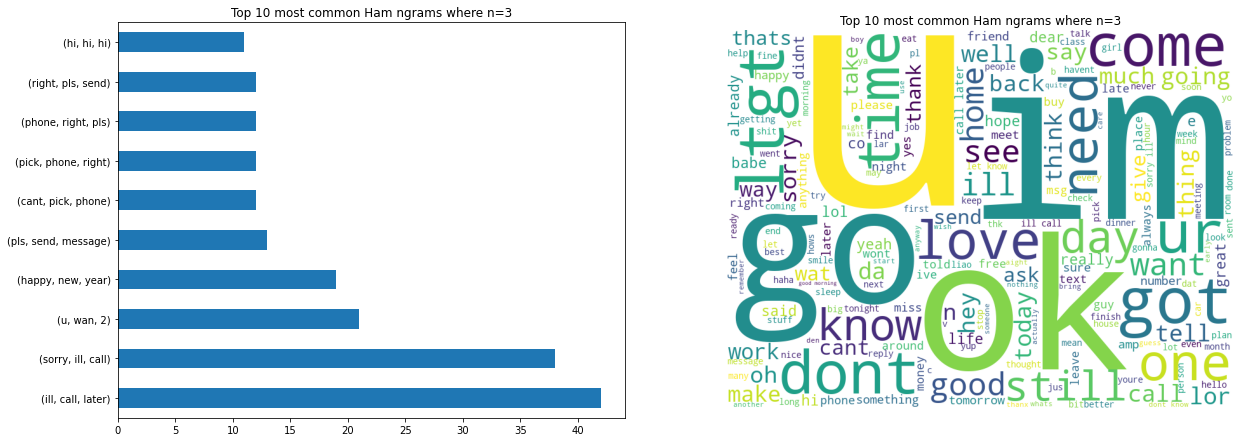

In [21]:
ngrams_wordcloud([spam_words, ham_words], ['Spam', 'Ham'], n=3)